In [1]:
# Solving XOR Gate using Multi-Layer Perceptron (MLP) from scratch
import numpy as np

In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.rand(self.input_size, self.hidden_size)
        self.b1 = np.random.rand(self.hidden_size)
        self.W2 = np.random.rand(self.hidden_size, self.output_size)
        self.b2 = np.random.rand(self.output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        output = self.sigmoid(self.z2)
        return output

    def backward(self, X, y, output):
        output_error = y - output
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, output_delta) * self.learning_rate
        self.b2 += np.sum(output_delta, axis=0) * self.learning_rate
        self.W1 += np.dot(X.T, hidden_delta) * self.learning_rate
        self.b1 += np.sum(hidden_delta, axis=0) * self.learning_rate

    def train(self, X, y, epochs=10000):
        for epoch in range(epochs):
            output = self.forward(X)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return np.round(output)

In [ ]:
import matplotlib.pyplot as plt


def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

In [ ]:
# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [5]:
# train the MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1)
mlp.train(X, y, epochs=10000)

Epoch 0, Loss: 0.36776099248920735
Epoch 1000, Loss: 0.24982132171109606
Epoch 2000, Loss: 0.2492591930027343
Epoch 3000, Loss: 0.24572749477379816
Epoch 4000, Loss: 0.22065406865512927
Epoch 5000, Loss: 0.1763782576102075
Epoch 6000, Loss: 0.09010595178756153
Epoch 7000, Loss: 0.02323318213821518
Epoch 8000, Loss: 0.010696512706602051
Epoch 9000, Loss: 0.006607385862727474


[[0.]
 [1.]
 [1.]
 [0.]]


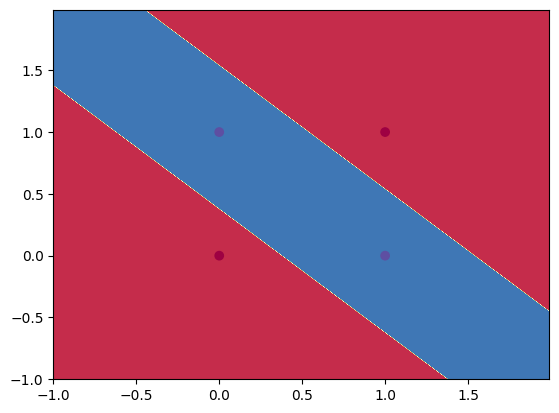

In [6]:
# test the MLP
predictions = mlp.predict(X)
print(predictions)
plot_decision_boundary(mlp, X, y)